This project will perform EDA on dataset for Titanic passengers (based on both provided train and test set) and create a model based on train set to predict test set 

The dataset was taken from Kaggle's Titanic - Machine Learning 

In [1]:
## import relevant modules 

## operational modules

import numpy as np
import pandas as pd 


## visualisation modules

import seaborn as sns
import matplotlib.pyplot as plt 

## model preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV

## machine learning models 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## model evaluation 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
## read both Excel file using pd

train = pd.read_csv(r'C:\Users\user\Downloads\train.csv')
test = pd.read_csv(r'C:\Users\user\Downloads\test.csv')

In [3]:
## assess columns and its information 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Information regarding the columns from original dataset:

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
## evaluate descriptive information for the train datasets 
train.shape


(891, 12)

Based on the output, there are 891 rows, with 12 columns 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Based on the output - there are 891 rows, however for age, cabin, and embarked columns, there are null values. 

In [7]:

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Based on the output, 
- less than the passengers survived (38%) 
- more passengers in 2nd and 3rd class
- mean age of passengers are in 29.6 yeras old 
- more than half of passengers were with their siblings, and less than half are parent and child 
- mean fare is 32.2 

In [8]:
## evaluate the test dataset 

test.shape

(418, 11)

Based on the output, there are 418 rows with 11 columns (less survival column in train set) 

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Based on the dataset, the columns for age, fare, and cabin has null values 

In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Based on the output, 
- more passengers are from 2nd and 3rd class 
- mean age of passengers is 30.2 years old 
- less than half of passengers boarded with siblings or parents/children
- mean fare is 35.6

Comparing both the train and test data, the columns for age, parents/children, and fare have close descriptive values 

Exploratory Data Analysis

Only the train dataset will be processed for EDA as the dataset will be used to train the ML model 
The columns with specific individual information such as PassengerID, Name, Ticket (number) will be excluded from EDA and the ML model creation later

In [11]:
## Evaluating rows will null values in age and fare. Given that cabin information is non-null only for passengers in class in 1, it will be excluded from the model later 

train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [12]:

train[train['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
train.columns



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
## evaluating distribution of the data - for categorical data

columns_to_evaluate = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_evaluate:
    print(train.value_counts(column))


Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [15]:
## evaluating distribution of the data for categorical data, in percentage

columns_to_evaluate = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_evaluate:
    print(train.value_counts(column, normalize=True)*100)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64
SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: proportion, dtype: float64
Parch
0    76.094276
1    13.243547
2     8.978676
3     0.561167
5     0.561167
4     0.448934
6     0.112233
Name: proportion, dtype: float64
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


Based on the result, 
- 61% of the passenger did not survive
- majority of the passengers are from 3rd class (55.10%), followed by 1st class (24.24%), and 2nd class (20.65%)
- more than half of the passengers are male (64.75%), than female (35.24%)
- majority of the passengers are not siblings (68%) or parent/child (76%)
- most passengers embarked from Southampton (72.44%) followed by Cherbourg (18.9%) and Queenstown (8.66%) 
- 

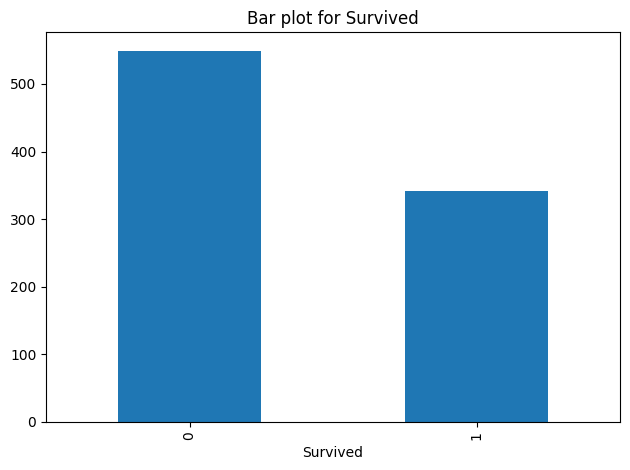

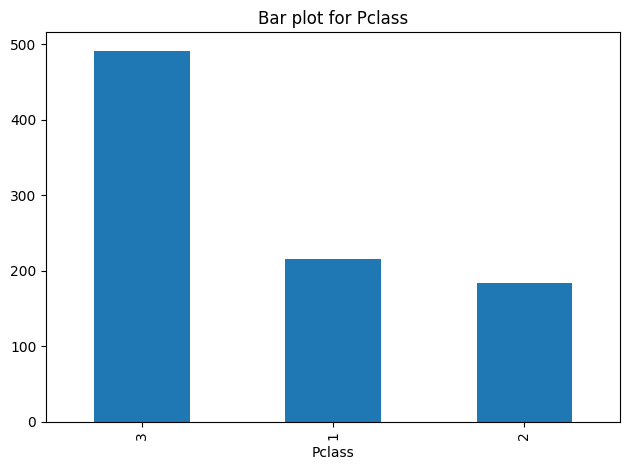

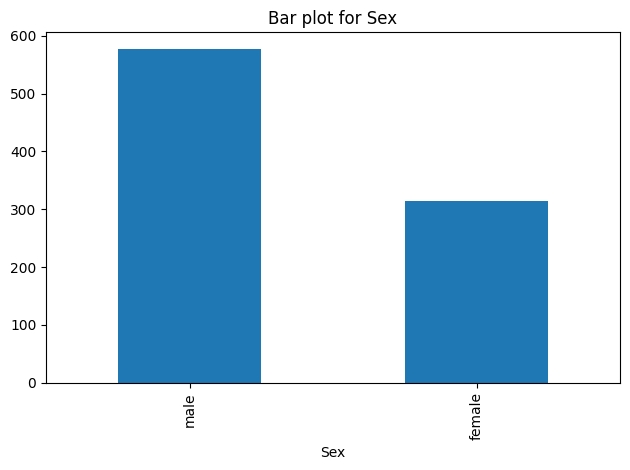

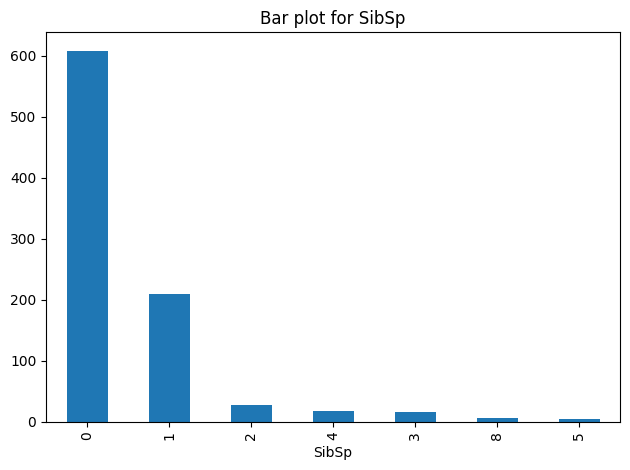

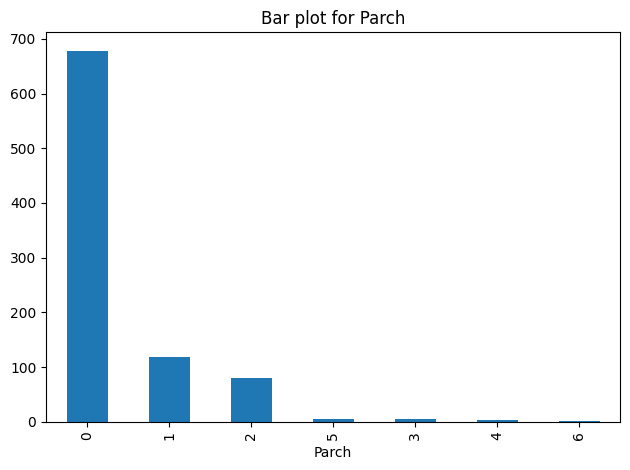

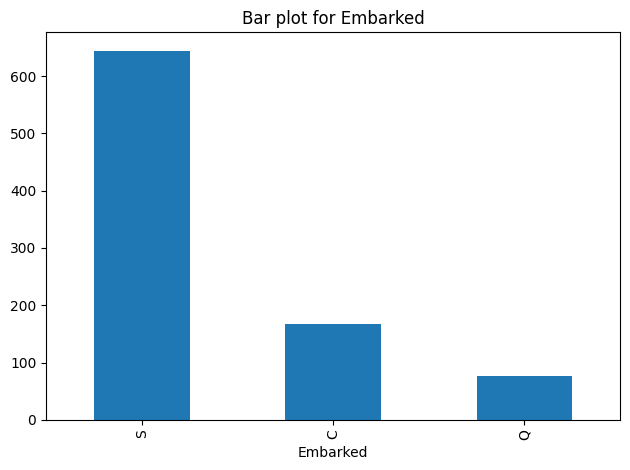

In [16]:
## evaluating distribution of categorical data in visual

columns_to_evaluate = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_evaluate:
     
    train[column].value_counts().plot(kind='bar')
    plt.title(f'Bar plot for {column}')
    plt.tight_layout()
    plt.show()

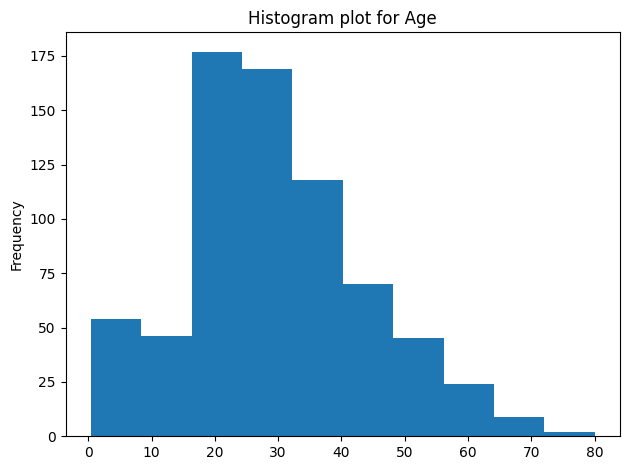

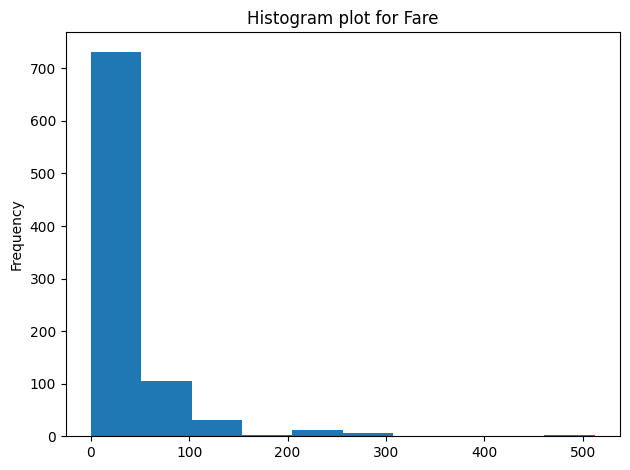

In [17]:
## evaluating distribution for numerical data 

columns_to_evaluate = ['Age', 'Fare']

for col in columns_to_evaluate:
    train[col].plot(kind='hist')
    plt.title(f'Histogram plot for {col}')
    plt.tight_layout()
    plt.show()

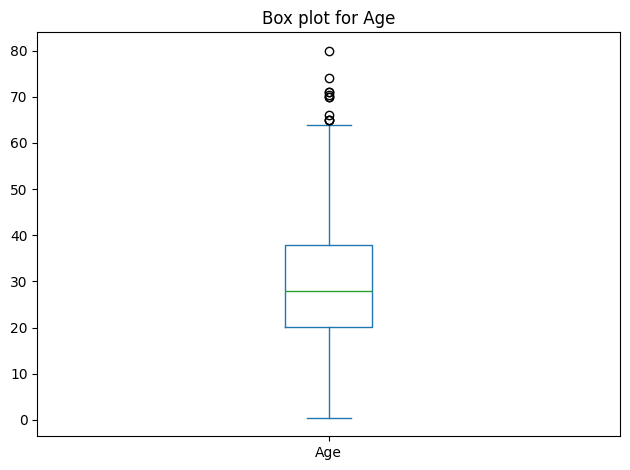

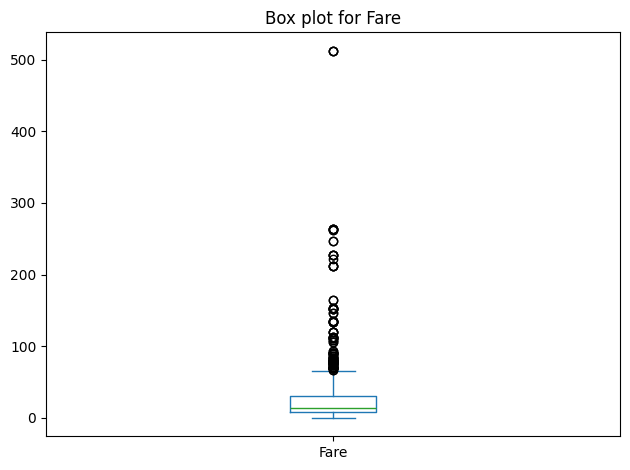

In [18]:
columns_to_evaluate = ['Age', 'Fare']

for col in columns_to_evaluate:
    train[col].plot(kind='box')
    plt.title(f'Box plot for {col}')
    plt.tight_layout()
    plt.show()

Based on the output,
- for age, majority of passengers' age in 20-30s groups, with outliers above 60 years old
- for fare, majority of the fare are in 0-50, with outliers above $100

In [19]:
## given there numbers of missing age rows - it will be filled by the median age 

train['Age'].fillna(train['Age'].median(), inplace=True)
train['Age'].isnull().value_counts().sum()

np.int64(891)

In [20]:

## check for duplicates 
train.duplicated().sum()

np.int64(0)

Machine Learning Model 

For this project, given that the outcome variable 'Survived' is a categorical variable, the following model will be used, 
- LogisticRegression
- DecisionTreeClassifier
- RandomForestClassifier

In [21]:
## Feature selection choose relevant variables for the model; variables such as name, passengerID, and cabin will be excluded 
train_ml = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
train_ml

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [22]:
## feature transformation: create dummies for sex and embarked columns 
train_ml = pd.get_dummies(train_ml)
train_ml

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,0,3,28.0,1,2,23.4500,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [23]:
## defining variables in x and y 

x = train_ml.drop(columns='Survived', axis=1)
y = train_ml['Survived']
x,y 

(     Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
 0         3  22.0      1      0   7.2500       False      True       False   
 1         1  38.0      1      0  71.2833        True     False        True   
 2         3  26.0      0      0   7.9250        True     False       False   
 3         1  35.0      1      0  53.1000        True     False       False   
 4         3  35.0      0      0   8.0500       False      True       False   
 ..      ...   ...    ...    ...      ...         ...       ...         ...   
 886       2  27.0      0      0  13.0000       False      True       False   
 887       1  19.0      0      0  30.0000        True     False       False   
 888       3  28.0      1      2  23.4500        True     False       False   
 889       1  26.0      0      0  30.0000       False      True        True   
 890       3  32.0      0      0   7.7500       False      True       False   
 
      Embarked_Q  Embarked_S  
 0         False   

In [24]:
## model preprocessing - the train set will be split into train set and valid set 

x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.25, stratify=y)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((668, 10), (223, 10), (668,), (223,))

In [25]:
## scale the data for logistic regression model 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)

In [26]:
## LogisticRegression model 

logreg = LogisticRegression()

logreg.fit(x_train_scaled, y_train)

LogisticRegression()

In [27]:
# Model 2 - Decision Tree Classifier, hyperparameter tuning 

clf = DecisionTreeClassifier(random_state=0)

param_grid = {'max_depth': [3,5,10, None],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4]}

clf_gs = GridSearchCV(clf, param_grid, cv=5)
clf_gs.fit(x_train, y_train)
clf_gs.best_params_, clf_gs.best_estimator_

({'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2},
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=0))

In [28]:
# Model 3 - Random Forest Classifier, hyperparameter tuning

rf = RandomForestClassifier(random_state=0)

param_grid = {'n_estimators': [50, 150, 300, 500],
              'max_depth': [5,15,25, 50],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,5],
              'max_features': ['auto', 'sqrt', None]
              }

rf_gs = GridSearchCV(rf, param_grid, cv=5)
rf_gs.fit(x_train, y_train)

rf_gs.best_estimator_, rf_gs.best_params_

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

(RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                        n_estimators=500, random_state=0),
 {'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 500})

In [29]:
# Evaluating model performance 

model_list = [logreg, clf_gs.best_estimator_, rf_gs.best_estimator_]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for i, model in enumerate(model_list):
    print(f'Metrics for {model_names[i]}:')
    if model == logreg:
        y_pred = model.predict(x_valid_scaled)
    else: 
        y_pred = model.predict(x_valid)
    print(f'Accuracy score:', accuracy_score(y_valid, y_pred)*100)
    print(f'Precision score:', precision_score(y_valid, y_pred)*100)
    print(f'Recall score:', recall_score(y_valid, y_pred)*100)
    print(f'F1 score:', f1_score(y_valid, y_pred)*100)
    print("-" * 50)

Metrics for Logistic Regression:
Accuracy score: 81.16591928251121
Precision score: 78.94736842105263
Recall score: 69.76744186046511
F1 score: 74.07407407407408
--------------------------------------------------
Metrics for Decision Tree:
Accuracy score: 80.26905829596413
Precision score: 76.92307692307693
Recall score: 69.76744186046511
F1 score: 73.17073170731707
--------------------------------------------------
Metrics for Random Forest:
Accuracy score: 84.75336322869956
Precision score: 86.11111111111111
Recall score: 72.09302325581395
F1 score: 78.48101265822784
--------------------------------------------------


Confusion matrix for: {'Logistic Regression'}
--------------------------------------------------
Confusion matrix for: {'Decision Tree'}
--------------------------------------------------
Confusion matrix for: {'Random Forest'}
--------------------------------------------------


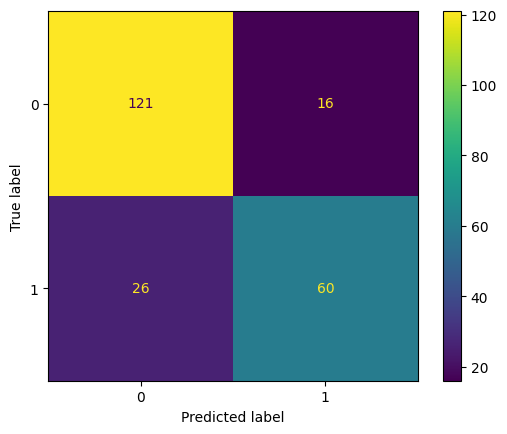

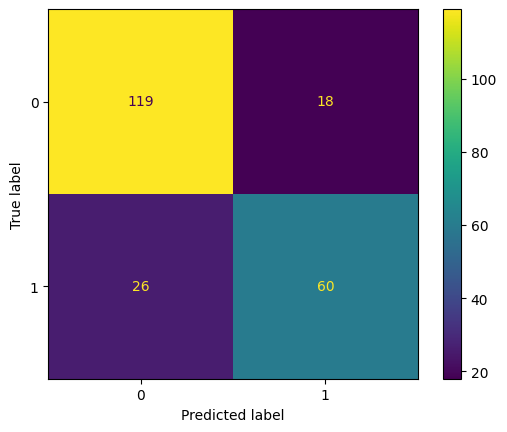

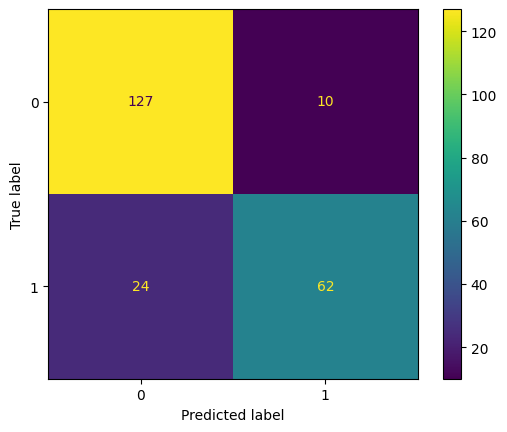

In [30]:
models = [logreg, clf_gs.best_estimator_, rf_gs.best_estimator_]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for i, model in enumerate(models):
    if model == logreg:
        y_pred = model.predict(x_valid_scaled)
    else:
        y_pred = model.predict(x_valid)
    cm = confusion_matrix(y_valid, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    
    print('Confusion matrix for:',{model_names[i]})
    print("-"*50)

Based on the metrics, decision tree model performs better than both logistic regression model and random forest classifier. 

This may be attributed to the small size of dataset and overfitting of random forest classifier wheh dealing with smaller dataset. 

As the decision tree performed better than the other model, it had been chosen as the champion dataset, to be tested with the test sample. 

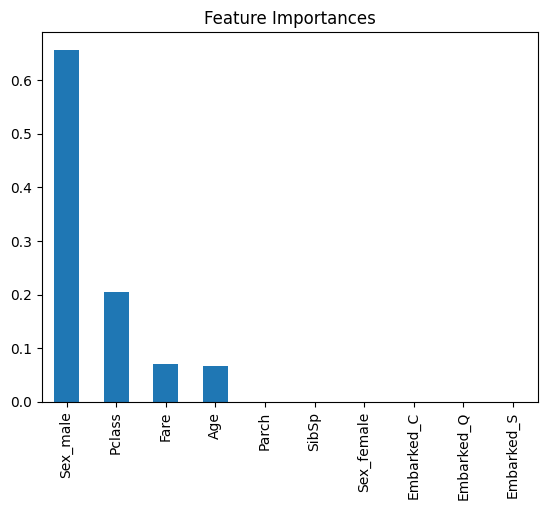

In [38]:
## Evaluating feature importances from the decision tree classifier 
best_model = clf_gs.best_estimator_
feature_importances = pd.Series(best_model.feature_importances_, index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importances')
plt.show()


Based on the output, the important features in determinining survivorship from the Titanic ship from the dataset is male sex, followed by fare and age.

In [31]:
## preparing the test dataset for prediction with decision tree classifier 

test.head()
## drop non relevant columns
test = test.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)



In [32]:
## evaluate for duplicates

test.duplicated().sum()

np.int64(38)

In [33]:
## evaluate for null rows

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [34]:
## replace null values with median of age 

test['Age'].fillna(test['Age'].median(), inplace=True)
test['Age'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_9064\1052572757.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)


np.int64(0)

In [35]:
## create dummies for categorical values

test_predict = pd.get_dummies(test)

In [36]:
y_test = clf_gs.best_estimator_.predict(test_predict)

Unfortunately, as the test dataset is part of Kaggle competition - the prediction from the decision tree model cannot be evaluated, as the true result of outcome variable is not available. 

In [37]:
## saving the predictions as csv 
df_y_test = pd.DataFrame(y_test, columns=['Predictions'])
df_y_test.to_csv('predictions.csv', index=False)

The model's prediction had been submitted to the competition with score of 0.76076.